In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
class DataProcessor:
    def __init__(self, file):
        self.file = file
        
    def load_data(self):
        return pd.read_csv(self.file)
    
    def clean_data(self, data):
        data = data.dropna(subset=["Category"])
        data["Rating"].fillna(0, inplace=True)
        data.drop("Product Link", axis=1, inplace=True)        
        return data

In [4]:
class DataAnalyzer:
    
    def get_average_of_column(self,column):
        self.column = column
        average = np.mean(self.column)
        return average
    
    def get_distribution_of_column(self,column):
        self.column = column
        distribution = np.std(self.column)
        return distribution
        
    def get_median_of_column(self,column):
        self.column = column
        median = np.median(self.column)
        return median
        
    def get_mod_of_column(self,column): 
        self.column = column
        mode = np.unique(self.column)
        return mode

In [5]:
class DataVisualizer:
        
    def plot_line_chart(data):
        
        return sns.lineplot(x="No of Seller", y="Price", hue="Category", data=df)
    
    def plot_distribution(data):
        
        return sns.displot(data=df,x='Quantity',kde=True)
        
    def plot_pie(data):
        
        Electronics_count = df["Category"].value_counts()["Electronics"]
        Clothing_count = df["Category"].value_counts()["Clothing Shoes & Jewelry"]
        Gift_count = df["Category"].value_counts()["Gift Cards"]

        array = np.array([Electronics_count, Clothing_count, Gift_count])
        keys = ["Electronics", "Clothing Shoes & Jewelry", "Gift Cards"]
        
        return plt.pie(array, labels=keys, autopct='%.0f%%')
        
    def plot_scatter(data):
        
        return sns.scatterplot(data=df,x="Price", y="Quantity", hue="Category", size="Rank")


In [6]:
file = "data/Amazon_Best_Seller_2021_June.csv"
Amazon_dataset = DataProcessor(file)
df = Amazon_dataset.load_data()
df.head()


,ASIN,Category,Product Link,No of Seller,Rank,Rating,Reviews Count,Price,Quantity
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,"640,721",$4.00,3
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,"854,114",$4.22,6
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,"267,821",$4.33,9
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27,4,4.8,"114,267",$4.44,12
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1,5,4.7,"267,821",$5.00,15


In [7]:
df.describe()

,No of Seller,Rank,Rating,Quantity
count,292.000000,292.000000,291.000000,292.000000
mean,4.544521,50.448630,4.596907,347.873288
std,8.855546,29.082666,0.203311,213.863980
min,1.000000,1.000000,4.000000,3.000000
25%,1.000000,25.000000,4.500000,96.000000
50%,1.000000,51.000000,4.600000,439.500000
75%,3.000000,75.250000,4.800000,532.500000
max,67.000000,100.000000,5.000000,614.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           292 non-null    object 
 1   Category       290 non-null    object 
 2   Product Link   292 non-null    object 
 3   No of Seller   292 non-null    int64  
 4   Rank           292 non-null    int64  
 5   Rating         291 non-null    float64
 6   Reviews Count  292 non-null    object 
 7   Price          292 non-null    object 
 8   Quantity       292 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 20.7+ KB


In [9]:
df['Rating']=df['Rating'].astype(float)

In [10]:
df['Rank']=df['Rank'].astype(int)

In [11]:
df['Price']=df['Price'].str.replace('$', '')
df['Price']=df['Price'].astype(float)

C:\Users\Salma\AppData\Local\Temp\ipykernel_2780\2811889715.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$', '')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           292 non-null    object 
 1   Category       290 non-null    object 
 2   Product Link   292 non-null    object 
 3   No of Seller   292 non-null    int64  
 4   Rank           292 non-null    int32  
 5   Rating         291 non-null    float64
 6   Reviews Count  292 non-null    object 
 7   Price          292 non-null    float64
 8   Quantity       292 non-null    int64  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 19.5+ KB


In [13]:
missing_values_count = df.isnull().sum()
# missing_values_count[0:10]
# total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print("Number of missing data:", total_missing)

Number of missing data: 3


In [14]:
data = Amazon_dataset.clean_data(df)

C:\Users\Salma\AppData\Local\Temp\ipykernel_2780\261131076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rating"].fillna(0, inplace=True)
C:\Users\Salma\AppData\Local\Temp\ipykernel_2780\261131076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Product Link", axis=1, inplace=True)


In [15]:
missing_values_count = data.isnull().sum()
# missing_values_count[0:10]
# total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print("Number of missing data:", total_missing)

Number of missing data: 0


In [16]:
data.head()

,ASIN,Category,No of Seller,Rank,Rating,Reviews Count,Price,Quantity
0,B079QHML21,Electronics,1,1,4.7,"640,721",4.00,3
1,B07FZ8S74R,Electronics,1,2,4.7,"854,114",4.22,6
2,B07XJ8C8F5,Electronics,1,3,4.7,"267,821",4.33,9
3,B07WVFCVJN,Electronics,27,4,4.8,"114,267",4.44,12
4,B08YT2N5SX,Electronics,1,5,4.7,"267,821",5.00,15


In [17]:
data.describe()

,No of Seller,Rank,Rating,Price,Quantity
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,4.568966,50.465517,4.581379,30.826724,349.524138
std,8.881208,29.095842,0.338117,20.937209,213.632339
min,1.000000,1.000000,0.000000,4.000000,3.000000
25%,1.000000,25.250000,4.500000,14.990000,96.500000
50%,1.000000,51.000000,4.600000,24.995000,442.500000
75%,3.000000,75.750000,4.800000,50.000000,533.500000
max,67.000000,100.000000,5.000000,99.990000,614.000000


In [18]:
Analysis = DataAnalyzer()

In [19]:
RatingMean = Analysis.get_average_of_column(df["Rating"])
RatingMean

4.596907216494844

In [20]:
RatingSd = Analysis.get_distribution_of_column(df["Rating"])
RatingSd

0.2029610401803353

In [21]:
RatingMedian = Analysis.get_median_of_column(df["Quantity"])
RatingMedian

439.5

In [22]:
RatingMode = Analysis.get_mod_of_column(df["No of Seller"])
RatingMode

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 16, 17, 18, 19,
       21, 23, 25, 27, 32, 36, 37, 51, 63, 67], dtype=int64)

In [23]:
Visualize = DataVisualizer()

<AxesSubplot:xlabel='No of Seller', ylabel='Price'>

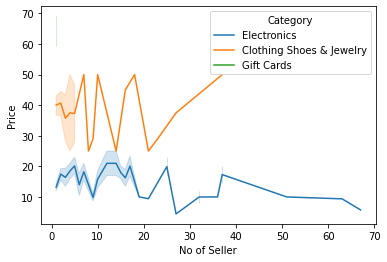

In [24]:
Visualize.plot_line_chart()

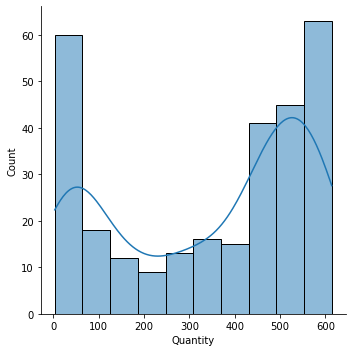

In [25]:
Visualize.plot_distribution()

([<matplotlib.patches.Wedge at 0x21d95798910>,
 [Text(6.735557395310444e-17, 1.1, 'Electronics'),
  Text(-0.515249265943755, -0.9718632588715461, 'Clothing Shoes & Jewelry'),
  Text(0.9718632588715461, -0.5152492659437551, 'Gift Cards')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-0.28104505415113906, -0.5301072321117524, '34%'),
  Text(0.5301072321117524, -0.28104505415113906, '16%')])

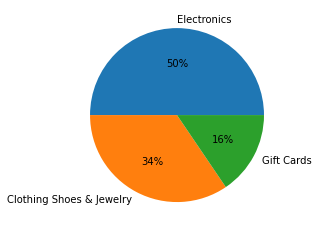

In [26]:
Electronics_count = df["Category"].value_counts()["Electronics"]
Clothing_count = df["Category"].value_counts()["Clothing Shoes & Jewelry"]
Gift_count = df["Category"].value_counts()["Gift Cards"]

array = np.array([Electronics_count, Clothing_count, Gift_count])
keys = ["Electronics", "Clothing Shoes & Jewelry", "Gift Cards"]

plt.pie(array, labels=keys, autopct='%.0f%%')
#Visualize.plot_pie()

<AxesSubplot:xlabel='Price', ylabel='Quantity'>

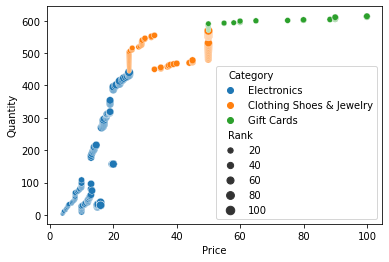

In [27]:
Visualize.plot_scatter()